In [15]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

In [22]:
flux = pd.read_csv('data/flux_nouveaux_emprunts.csv')

In [23]:
flux.head()

,date,emprunts_M€
0,2023-10-31,11877
1,2023-09-30,11439
2,2023-08-31,13580
3,2023-07-31,15168
4,2023-06-30,16035


In [24]:
taux = pd.read_csv('data/taux_interet.csv').set_index('date')

In [25]:
flux.head()

,date,emprunts_M€
0,2023-10-31,11877
1,2023-09-30,11439
2,2023-08-31,13580
3,2023-07-31,15168
4,2023-06-30,16035


In [26]:
flux['taux'] = flux.apply(lambda row: taux.loc[row['date']]['taux'] if row['date'] in taux.index.to_list() else pd.NaT, axis=1)

In [27]:
flux = flux.dropna()
flux = flux.set_index(pd.DatetimeIndex(flux['date']))
flux = flux.drop(columns=['date'])
flux = flux.astype('float16')
flux.head()

,emprunts_M€,taux
date,,
2023-10-31,11877,3.87
2023-09-30,11439,3.73
2023-08-31,13580,3.62
2023-07-31,15168,3.43
2023-06-30,16035,3.25


In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x = flux.index, y = flux['emprunts_M€'], name='Flux of mortgages'), 
    secondary_y=False)

fig.add_trace(
    go.Scatter(x = flux.index, y = flux['taux'], name='Interest rate'),
    secondary_y=True)

fig.update_layout(dict(title="The flux of mortgages (in million Euro's) compared to the intrest rate in France",
                        title_font_family="Times New Roman",
                        title_font_size = 24,
                        yaxis1 = dict(
                            range=[5000,45000], # update
                            tickmode = 'array',
                            tickvals = [i for i in range(5000,45000,5000)],
                        ),
                        yaxis2 = dict(
                            range=[0,4], # update
                            tickmode = 'array',
                            tickvals = [i for i in range(0,4,1)],
                        ), 
                        xaxis = dict(
                            tickangle = 45
                        )
                       ))
fig.show()

In [14]:
flux.corr()

,emprunts_M€,taux
emprunts_M€,1.000000,-0.608564
taux,-0.608564,1.000000


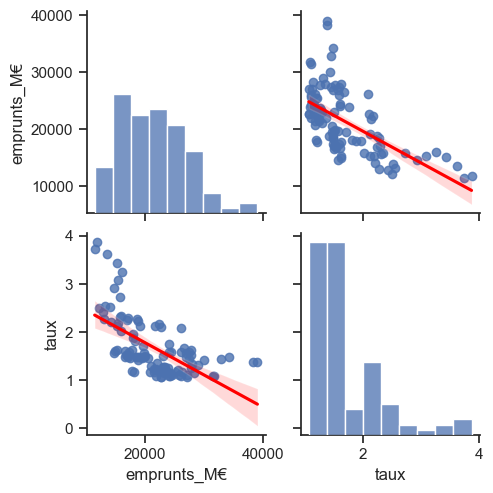

In [37]:
sns.set_theme(style="ticks", color_codes=True)
sns.pairplot(
    flux,
     kind='reg',
     plot_kws={'line_kws':{'color':'red'}}
    )